In [13]:
from extract import extract
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [14]:
# get data here
experiment_name = 'experiment_2'
rootpath = '/Users/nils/Downloads/results'
data = extract(rootpath)

In [15]:
# the number of nodes that run worker is the key of the dict
max_worker_nodes = len(data[experiment_name].keys())

# since we tested 1, 2, 3... nodes
X = np.arange(max_worker_nodes) + 1
# 
finished_all =[]
finished_mean = []
finished_min = []
finished_max = []
# 
#iterate over all worker_nodes
for experiement_number in range(1, max_worker_nodes+1):
    experiment_key = 'node-count-' + str(experiement_number)
    experiment = data[experiment_name][experiment_key]
    round_finished = []
    number_of_rounds = len(experiment.keys())
    for round_number in range(1,number_of_rounds+1):
        round_key = 'round-'+ str(round_number)
        if round_key in experiment.keys():
            round = experiment[round_key]
            finished = int(round['finish'])
            round_finished.append(finished)

    finished_all.append(round_finished)
    finished_min.append(min(round_finished))
    finished_max.append(max(round_finished))
    finished_mean.append(np.array(round_finished).mean())



In [16]:
def linear_scaling_plot(Y, save_to, x_min, x_max, y_min, y_max, title=None):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(X, Y, '-o', color='tab:blue')
    
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Time in ms")
    ax.yaxis.grid()
    
    # set the limits
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    
    if title:
        ax.set_title(title)
    
    # display the plot
    plt.show()
    fig.savefig(save_to)

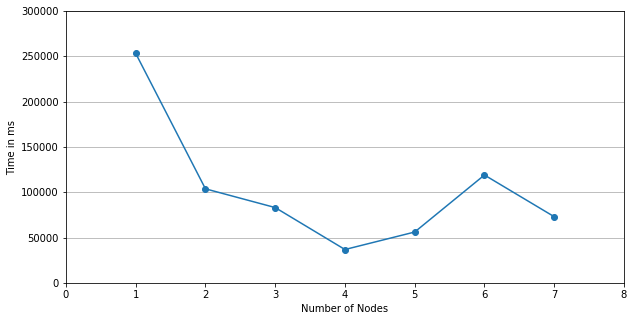

In [17]:
# plot MEAN data
Y = np.array(finished_mean)
linear_scaling_plot(Y, 'linear-scale-mean.pdf', 0, 8, 0, 300000)

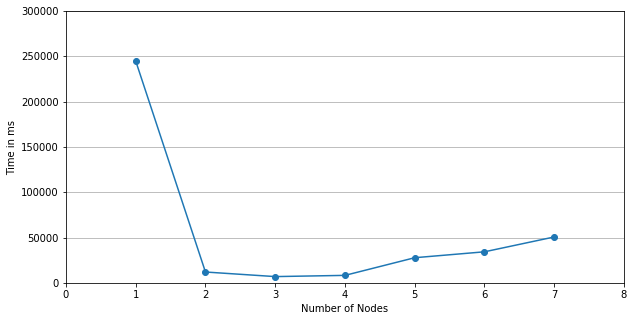

In [18]:
# plot MIN data
Y = np.array(finished_min)
linear_scaling_plot(Y, 'linear-scale-min.pdf', 0, 8, 0, 300000)

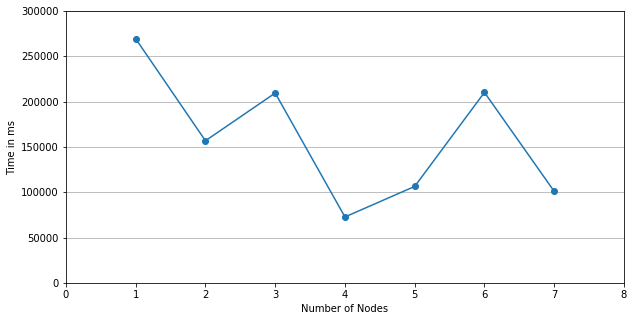

In [19]:
# plot MAX data
Y = np.array(finished_max)
linear_scaling_plot(Y, 'linear-scale-max.pdf', 0, 8, 0, 300000)